In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy import fftpack
from scipy.integrate import quad, quadrature

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

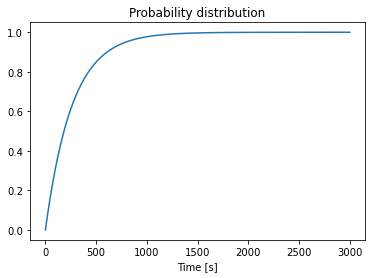

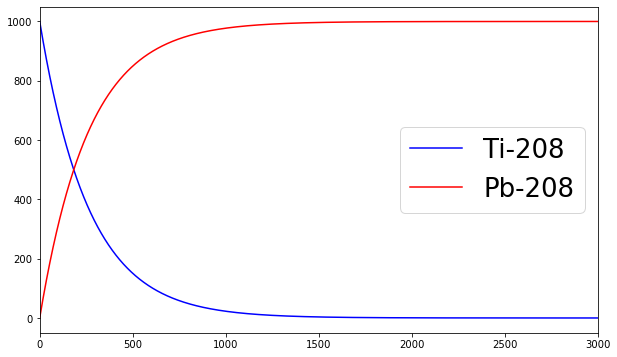

In [3]:
N0=1000
tau=3.052*60

def p(t):
 return 1-2**(-t/tau)

t=np.arange(3000)
y=p(t)
plt.plot(t,y)
plt.title("Probability distribution")
plt.xlabel("Time [s]")
plt.show()

#after every second every nucleus has a probability p(1) to decay hence at every step we sould remove p(1)*N(i-1) to the N[i-1]

#initial population of  Ti
N=np.array([N0])

#population of Pb
F=np.array([0])

for i in range(1,3000):
    N=np.append(N,N[i-1]-p(1)*N[i-1])
    F=np.append(F,F[i-1]+p(1)*N[i-1])
    
    
#graphic

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.plot(t, N , c='blue', label="Ti-208")
ax.plot(t, F, c='red', label="Pb-208")
ax.legend(loc='center right', prop={'size': 26})
ax.set_xlim([0, 3000])
plt.show()



* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

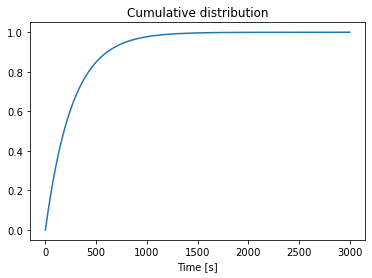

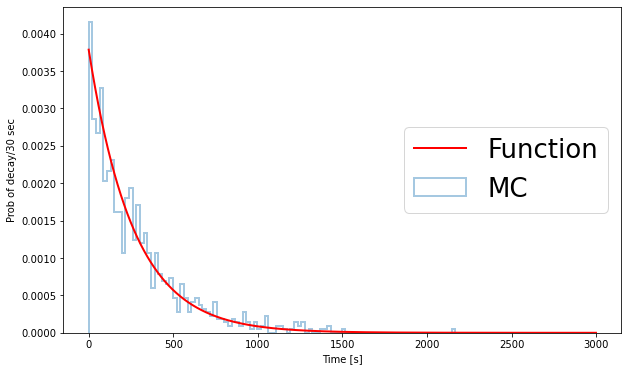

Check that the pdf is correctly normalized

The integral of the pdf is	 1.0 +- 6.404908233397037e-12


In [4]:
def f(t):
    return (2**(-t/tau)*np.log(2)/tau)
def cdf(t):
    return 1-np.exp(-t*np.log(2)/tau)

#
y2=cdf(t)
plt.plot(t,y2)
plt.title("Cumulative distribution")
plt.xlabel("Time [s]")
plt.show()

def inverse(y):
    return (-np.log(1-y)*tau/(np.log(2)))
u = np.random.random(1000)
v = inverse(u) 



fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.hist(v, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4, label="MC")  # plot histogram of the sample v
ax.plot(t, f(t) , c='red', label="Function",linewidth=2)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Prob of decay/30 sec")
ax.legend(loc='center right', prop={'size': 26})
plt.show()

print("Check that the pdf is correctly normalized\n")
result = quad(lambda x:f(x), 0, np.inf)


print("The integral of the pdf is\t",result[0],"+-",result[1])

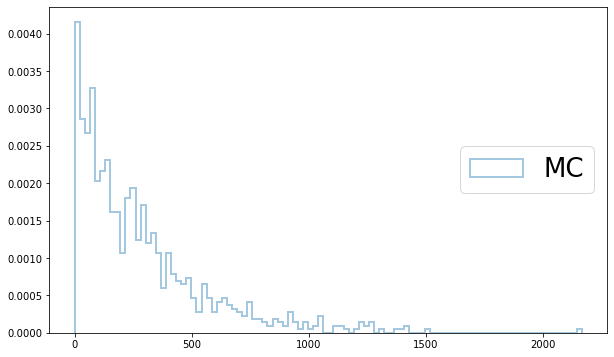

In [5]:

v = inverse(u)
factor=1
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.hist(v, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4,weights=factor*np.ones_like(v), label="MC")  # plot histogram of the sample v
#ax.plot(t, f(t) , c='red', label="Function",linewidth=2)
ax.legend(loc='center right', prop={'size': 26})
plt.show()


In [6]:
v

array([4.92618814e+02, 5.24060104e+02, 2.10285986e+01, 3.71697230e+02,
       1.22146057e+02, 1.16609260e+01, 7.84245806e+01, 1.64904977e+02,
       4.16152217e+01, 4.31276399e+02, 4.23436399e+02, 4.06272109e+02,
       8.41598596e+01, 8.87469805e+00, 3.44010563e+02, 6.36119633e+02,
       7.66728887e+02, 1.27146035e+02, 1.15247999e+03, 6.77901508e+01,
       2.72954598e+02, 1.66725701e+02, 1.12635409e+02, 2.63022673e+02,
       6.38489066e+02, 1.12739086e+01, 3.97957996e+02, 5.76485835e+02,
       2.16968455e+02, 1.48669501e+02, 7.46670672e+01, 9.19028102e+01,
       2.41280820e+02, 6.19533397e+02, 6.11222358e+01, 2.22032684e+02,
       1.16277573e+02, 1.49890195e+02, 2.29018005e+02, 1.22113634e+03,
       5.67798836e+02, 3.91843414e+02, 2.11659896e+02, 7.57864248e+01,
       9.47780047e+02, 4.81300741e+01, 3.97157556e+02, 1.83930677e+02,
       3.36809909e+01, 1.76236245e+02, 5.27020990e+02, 2.27470338e+01,
       3.55639797e+02, 2.35589889e+02, 4.83761970e+02, 2.96654955e+02,
      

In [7]:
v/2

array([2.46309407e+02, 2.62030052e+02, 1.05142993e+01, 1.85848615e+02,
       6.10730285e+01, 5.83046302e+00, 3.92122903e+01, 8.24524886e+01,
       2.08076109e+01, 2.15638199e+02, 2.11718200e+02, 2.03136055e+02,
       4.20799298e+01, 4.43734903e+00, 1.72005282e+02, 3.18059816e+02,
       3.83364444e+02, 6.35730175e+01, 5.76239995e+02, 3.38950754e+01,
       1.36477299e+02, 8.33628506e+01, 5.63177046e+01, 1.31511337e+02,
       3.19244533e+02, 5.63695429e+00, 1.98978998e+02, 2.88242917e+02,
       1.08484227e+02, 7.43347503e+01, 3.73335336e+01, 4.59514051e+01,
       1.20640410e+02, 3.09766699e+02, 3.05611179e+01, 1.11016342e+02,
       5.81387864e+01, 7.49450977e+01, 1.14509002e+02, 6.10568170e+02,
       2.83899418e+02, 1.95921707e+02, 1.05829948e+02, 3.78932124e+01,
       4.73890023e+02, 2.40650371e+01, 1.98578778e+02, 9.19653387e+01,
       1.68404955e+01, 8.81181227e+01, 2.63510495e+02, 1.13735169e+01,
       1.77819899e+02, 1.17794945e+02, 2.41880985e+02, 1.48327477e+02,
      

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The exercise require to compute the integral between [0-2].
 However there is a divergence in x=1.
One can see that the area under the funcion in the range [0-1] is the same of that in the range [1-2], so NUMERICALLY the integral is just the double of the value found in [0-1] even if the function is NOT integrable


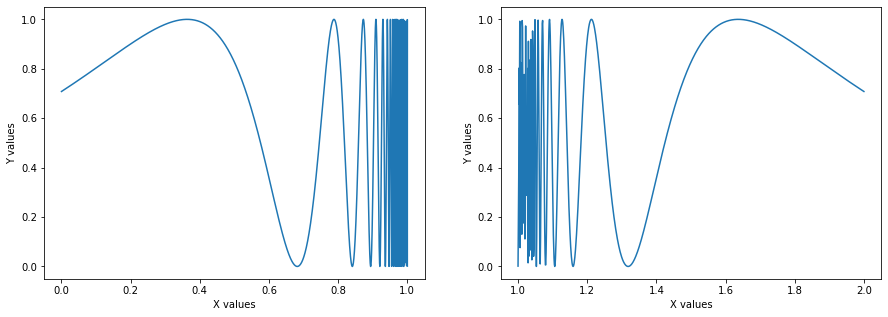

In [8]:
print('''The exercise require to compute the integral between [0-2].\n However there is a divergence in x=1.
One can see that the area under the funcion in the range [0-1] is the same of that in the range [1-2], so NUMERICALLY the integral is just the double of the value found in [0-1] even if the function is NOT integrable''')



def g(x):
    return np.sin(1/(1-x))*np.sin(1/(1-x))

xa=np.linspace(0,0.99999,10000)
xb=np.linspace(1.00001,2,1000)


fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(xa, g(xa))
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')

axs[1].plot(xb, g(xb))
axs[1].set_xlabel('X values')
axs[1].set_ylabel('Y values')

plt.show()


* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [9]:

#define an array of results
res=np.array([])
N = 10000 # number of generated to compute the integral
iterations=100
for j in range(iterations):
    count = 0
    for i in range(N):
        x = np.random.random()
        y = np.random.random()

        if y < g(x): count += 1
    I=2*count/N
    res=np.append(res,I)
    #print("Integral:", I)

print("The integral of the function between [0-2] with the hit/reject method is ", np.mean(res)," +- ", np.std(res)/np.sqrt(iterations))



p=1000

x=np.linspace(0,0.99999,10000)
values=g(x)
mean=np.mean(values)
print("The mean values between [0-1] is",mean)
print("The integral with the mean value between [0-1] is then trivially ", mean)
print("The integral between [0-2] with the mean value method (with the limitations discussed above) is ", 2*mean, " +- ", np.std(values)/np.sqrt(p))

print("Compatibility: ", np.abs(np.mean(res)-2*mean)/(np.std(res)**2/iterations+np.std(values)/p))

The integral of the function between [0-2] with the hit/reject method is  1.3466  +-  0.0008708708285388814
The mean values between [0-1] is 0.6731921963345148
The integral with the mean value between [0-1] is then trivially  0.6731921963345148
The integral between [0-2] with the mean value method (with the limitations discussed above) is  1.3463843926690295  +-  0.010335221823544093
Compatibility:  0.6581685015864751


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
print("Generation of random numbers between [0-1] in x and y then evaluation of hit/reject method")
def f(x,y):
    return x**2+y**2
count = 0
N=10000
for i in range(N):
    x = np.random.random()
    y = np.random.random()

    if f(x,y) < 1: count += 1
    I=4*count/N
print("Integral: ",I)

Generation of random numbers between [0-1] in x and y then evaluation of hit/reject method
Integral:  3.1392


In [11]:

#3D sphere
def f(a,b,c,):
    return a**2+b**2+c**2
count = 0
N=1000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()

    if f(a,b,c) < 1: count += 1
    I=8*count/N
print("Integral: ",I)

Integral:  4.185296


In [ ]:
#10D shpere
def ften(a,b,c,d,f,g,h,j,k,l):
    return a**2+b**2+c**2+d**2+f**2+g**2+h**2+j**2+k**2+l**2

count = 0
N=9000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    d = np.random.random()
    f = np.random.random()
    g = np.random.random()
    h = np.random.random()
    j = np.random.random()
    k = np.random.random()
    l = np.random.random()


    if ften(a,b,c,d,f,g,h,j,k,l) < 1: count += 1
    I=2**10*count/N
print("Integral: ",I)


In [ ]:
print("The analytical result is given by: ", np.pi**5/120)


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.


$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

In [ ]:
N=1000000
def w(x):
    return 1/np.sqrt(x)
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

x=np.linspace(0.0000001,1,N)



plt.plot(x,f(x),label='f')
plt.plot(x,w(x),label='w')
plt.xlim(0.01,1)
plt.ylim(0,20)
plt.legend()
plt.show()

In [ ]:
#z sono numeri generati con la w
z=np.array([])
N=1000000
for i in range(N):
    x = np.random.random()
    y = np.random.random()*w(0.0000001)

    if w(x) > y: 
        z=np.append(z,x)

        
fig, ax = plt.subplots(figsize=(5, 3)) # create the figure and the axes
ax.hist(z, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4)  # plot histogram of the sample v
#ax.plot(t, f(t) , c='red', label="Function",linewidth=2)
#ax.legend(loc='center right', prop={'size': 26})
plt.show()


wv=w(z)
fv=f(z)
ratio=fv/wv

#the integral of the 1/sqrt(x) is trivially calculated analytically:
weightintegral = 2

print("The value of the integral is ",np.mean(ratio)*weightintegral)
